In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


## Import the Dataset

In [2]:
import pandas as pd
import numpy as np
import io

train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col=0)
print("Shape of the train dataset (Rows, Columns): ", train_df.shape)

Shape of the train dataset (Rows, Columns):  (1460, 80)


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

## Exploratory Data Analysis

### Check for missing values

In [4]:
train_df.isna().any().value_counts()

False    61
True     19
dtype: int64

- Out of 80 columns, missing values are present in 19.

In [5]:
missing_values_count = train_df.isnull().sum().sort_values(ascending=False)
missing_values_count.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [6]:
missing_value_percentage = round((train_df.isnull().sum().sort_values(ascending=False))*100 / len(train_df), 2)
missing_value_percentage.head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtCond         2.53
BsmtQual         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
MSSubClass       0.00
dtype: float64

- The features like PoolQC, MiscFeature, Alley, Fence, and FireplaceQu have a huge percentage of missing values. It does not make sense to recreate such huge percentage of data. Hence it is best to drop these columns.
- The rest of the columns with missing values can be treated with imputation techniques.
- We can also visualize the missing values with a heatmap

<AxesSubplot:ylabel='Id'>

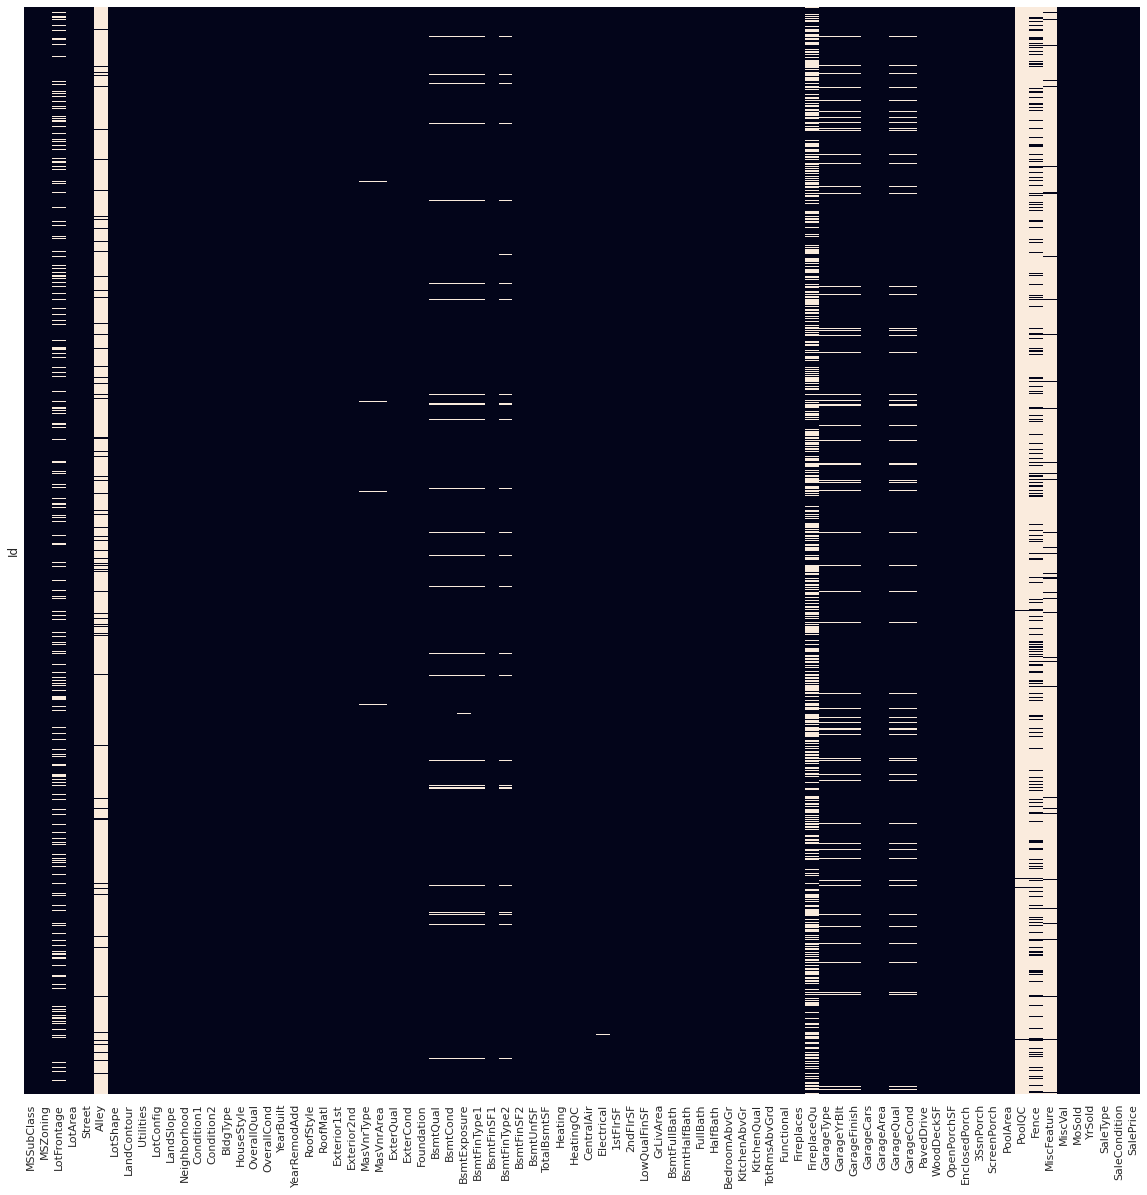

In [7]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(20, 20)})

sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False)

In [8]:
train_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [9]:
train_df = train_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])
train_df.shape

(1460, 75)

In [10]:
missing_value_percentage = round((train_df.isnull().sum().sort_values(ascending=False))*100 / len(train_df), 2)
missing_value_percentage.head(20)

LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
dtype: float64

In [11]:
mis_cols_list = ['LotFrontage', 'GarageType', 'GarageYrBlt', 
                 'GarageFinish', 'GarageQual', 'GarageCond', 
                'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 
                 'BsmtCond', 'BsmtFinType1', 'MasVnrArea', 
                 'MasVnrType', 'Electrical']

for column in mis_cols_list:
    print("The datatype for feature {}: ".format(column), train_df[column].dtype)

The datatype for feature LotFrontage:  float64
The datatype for feature GarageType:  object
The datatype for feature GarageYrBlt:  float64
The datatype for feature GarageFinish:  object
The datatype for feature GarageQual:  object
The datatype for feature GarageCond:  object
The datatype for feature BsmtFinType2:  object
The datatype for feature BsmtExposure:  object
The datatype for feature BsmtQual:  object
The datatype for feature BsmtCond:  object
The datatype for feature BsmtFinType1:  object
The datatype for feature MasVnrArea:  float64
The datatype for feature MasVnrType:  object
The datatype for feature Electrical:  object


In [12]:
for column in mis_cols_list:
    print("The number of unique values in column {}= ".format(column), train_df[column].nunique())

The number of unique values in column LotFrontage=  110
The number of unique values in column GarageType=  6
The number of unique values in column GarageYrBlt=  97
The number of unique values in column GarageFinish=  3
The number of unique values in column GarageQual=  5
The number of unique values in column GarageCond=  5
The number of unique values in column BsmtFinType2=  6
The number of unique values in column BsmtExposure=  4
The number of unique values in column BsmtQual=  4
The number of unique values in column BsmtCond=  4
The number of unique values in column BsmtFinType1=  6
The number of unique values in column MasVnrArea=  327
The number of unique values in column MasVnrType=  4
The number of unique values in column Electrical=  5


In [13]:
object_cols = ['GarageType', 'GarageFinish', 'GarageQual', 
               'GarageCond', 'BsmtFinType2', 'BsmtExposure', 
               'BsmtQual', 'BsmtCond', 'BsmtFinType1', 
               'MasVnrType', 'Electrical']
numeric_cols = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

for column in object_cols:
    train_df[column] = train_df[column].fillna(train_df[column].mode()[0])
    
for column in numeric_cols:
    train_df[column] = train_df[column].fillna(train_df[column].mean())

In [14]:
train_df.isnull().any().value_counts()

False    75
dtype: int64

## Import, Check and Treat the Test Dataset

In [15]:
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col=0)
print("Dimensions of the test dataset(Rows, Columns):", test_df.shape)

Dimensions of the test dataset(Rows, Columns): (1459, 79)


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearB

In [17]:
test_df.isna().any().value_counts()

False    46
True     33
dtype: int64

- There are 33 columns with missing values.

<AxesSubplot:ylabel='Id'>

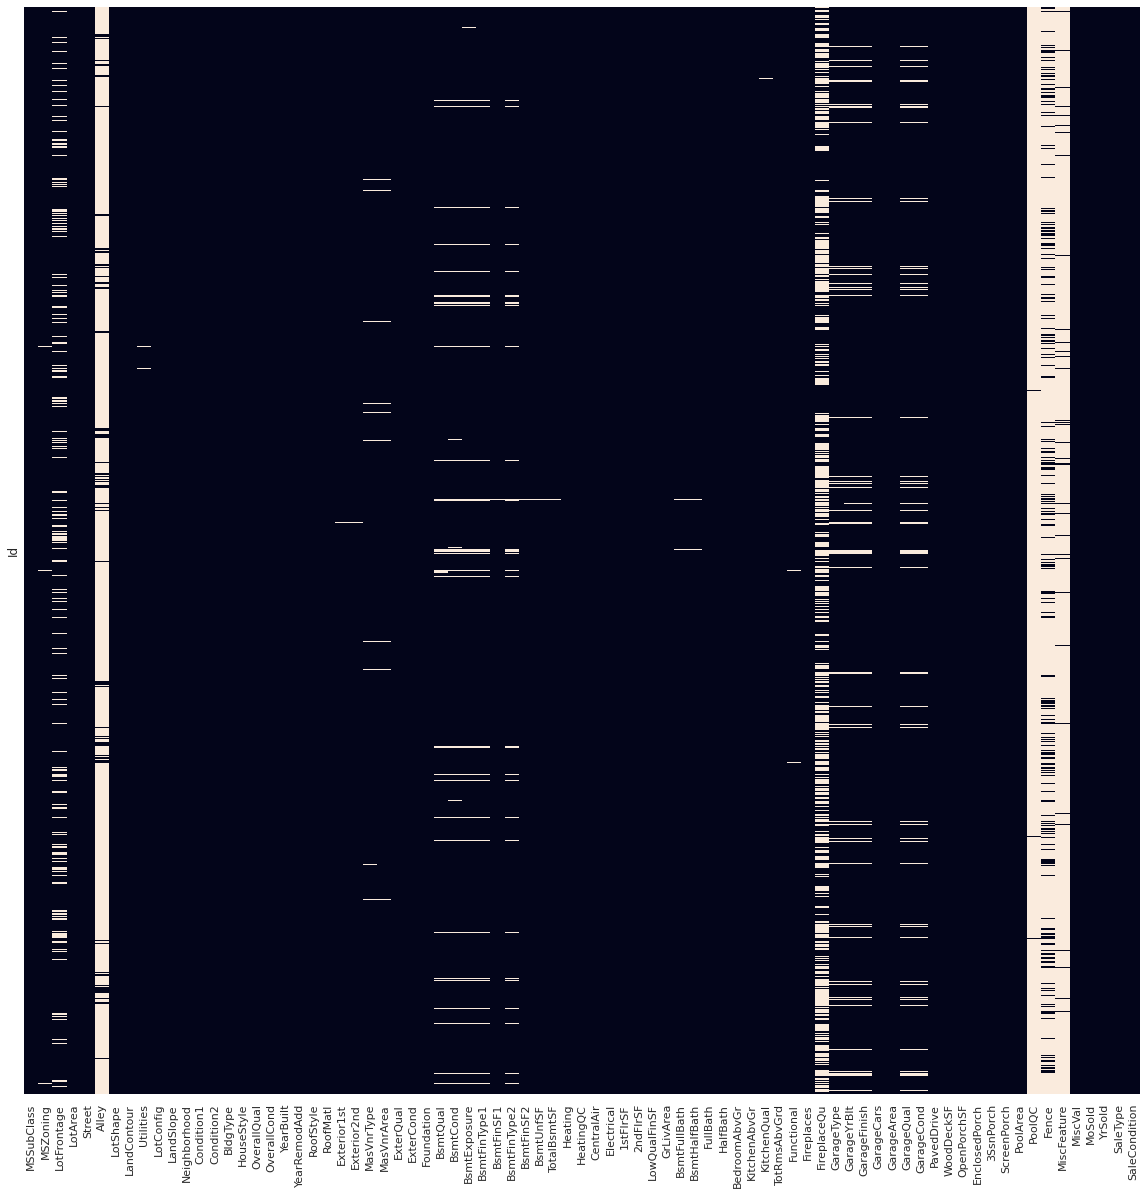

In [18]:
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False)

In [19]:
missing_values_count = test_df.isnull().sum().sort_values(ascending=False)
missing_values_count.head(35)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
SaleType           1
BsmtFinSF1         1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
BsmtFinSF2         1
TotRmsAbvGrd       0
KitchenAbvGr       0
dtype: int64

In [20]:
missing_values_percentage = round((test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df), 2)
missing_values_percentage.head(35)

PoolQC          99.79
MiscFeature     96.50
Alley           92.67
Fence           80.12
FireplaceQu     50.03
LotFrontage     15.56
GarageYrBlt      5.35
GarageFinish     5.35
GarageQual       5.35
GarageCond       5.35
GarageType       5.21
BsmtCond         3.08
BsmtExposure     3.02
BsmtQual         3.02
BsmtFinType2     2.88
BsmtFinType1     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
Functional       0.14
BsmtHalfBath     0.14
BsmtFullBath     0.14
Utilities        0.14
KitchenQual      0.07
SaleType         0.07
BsmtFinSF1       0.07
GarageCars       0.07
BsmtUnfSF        0.07
TotalBsmtSF      0.07
Exterior2nd      0.07
Exterior1st      0.07
GarageArea       0.07
BsmtFinSF2       0.07
TotRmsAbvGrd     0.00
KitchenAbvGr     0.00
dtype: float64

In [21]:
test_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [22]:
test_df = test_df.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

test_df.shape

(1459, 74)

In [23]:
missing_values_percentage = round((test_df.isnull().sum().sort_values(ascending=False)*100)/len(test_df), 2)
missing_values_percentage.head(35)

LotFrontage     15.56
GarageCond       5.35
GarageYrBlt      5.35
GarageFinish     5.35
GarageQual       5.35
GarageType       5.21
BsmtCond         3.08
BsmtExposure     3.02
BsmtQual         3.02
BsmtFinType1     2.88
BsmtFinType2     2.88
MasVnrType       1.10
MasVnrArea       1.03
MSZoning         0.27
Functional       0.14
BsmtHalfBath     0.14
Utilities        0.14
BsmtFullBath     0.14
BsmtFinSF1       0.07
BsmtFinSF2       0.07
BsmtUnfSF        0.07
TotalBsmtSF      0.07
KitchenQual      0.07
Exterior2nd      0.07
Exterior1st      0.07
GarageArea       0.07
SaleType         0.07
GarageCars       0.07
MoSold           0.00
FullBath         0.00
HalfBath         0.00
BedroomAbvGr     0.00
KitchenAbvGr     0.00
TotRmsAbvGrd     0.00
YrSold           0.00
dtype: float64

In [24]:
mis_cols_list = ['LotFrontage', 'GarageCond', 'GarageYrBlt', 
                 'GarageFinish', 'GarageQual', 'GarageType', 
                 'BsmtCond', 'BsmtExposure', 'BsmtQual', 
                 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType',
                 'MasVnrArea', 'MSZoning', 'Functional', 
                 'BsmtHalfBath', 'Utilities', 'BsmtFullBath', 
                 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 
                 'TotalBsmtSF', 'KitchenQual', 'Exterior2nd', 
                'Exterior1st', 'GarageArea', 'SaleType', 
                 'GarageCars']

for column in mis_cols_list:
    print("The datatype of the column {} = ".format(column), test_df[column].dtype)    

The datatype of the column LotFrontage =  float64
The datatype of the column GarageCond =  object
The datatype of the column GarageYrBlt =  float64
The datatype of the column GarageFinish =  object
The datatype of the column GarageQual =  object
The datatype of the column GarageType =  object
The datatype of the column BsmtCond =  object
The datatype of the column BsmtExposure =  object
The datatype of the column BsmtQual =  object
The datatype of the column BsmtFinType1 =  object
The datatype of the column BsmtFinType2 =  object
The datatype of the column MasVnrType =  object
The datatype of the column MasVnrArea =  float64
The datatype of the column MSZoning =  object
The datatype of the column Functional =  object
The datatype of the column BsmtHalfBath =  float64
The datatype of the column Utilities =  object
The datatype of the column BsmtFullBath =  float64
The datatype of the column BsmtFinSF1 =  float64
The datatype of the column BsmtFinSF2 =  float64
The datatype of the column

In [25]:
for column in mis_cols_list:
    print("The number of unique values in column {}= ".format(column), test_df[column].nunique())

The number of unique values in column LotFrontage=  115
The number of unique values in column GarageCond=  5
The number of unique values in column GarageYrBlt=  97
The number of unique values in column GarageFinish=  3
The number of unique values in column GarageQual=  4
The number of unique values in column GarageType=  6
The number of unique values in column BsmtCond=  4
The number of unique values in column BsmtExposure=  4
The number of unique values in column BsmtQual=  4
The number of unique values in column BsmtFinType1=  6
The number of unique values in column BsmtFinType2=  6
The number of unique values in column MasVnrType=  4
The number of unique values in column MasVnrArea=  303
The number of unique values in column MSZoning=  5
The number of unique values in column Functional=  7
The number of unique values in column BsmtHalfBath=  3
The number of unique values in column Utilities=  1
The number of unique values in column BsmtFullBath=  4
The number of unique values in col

In [26]:
test_df['BsmtHalfBath'] = test_df['BsmtHalfBath'].astype('object')

print(test_df['BsmtHalfBath'].dtype)

object
